In [2]:
import pandas as pd
data = pd.read_csv('chicago_crimes.csv')  # Ajusta el nombre del archivo según corresponda
print(data.head())  # Verifica las primeras filas del DataFrame original
print(data.shape)   # Verifica las dimensiones del DataFrame original

         ID Case Number                    Date                 Block  IUCR  \
0  13644536    JH485110  10/25/2024 12:00:00 AM     042XX N MASON AVE  1153   
1  13643287    JH483556  10/25/2024 12:00:00 AM    036XX N LEAVITT ST  1130   
2  13641969    JH481866  10/25/2024 12:00:00 AM  041XX W PETERSON AVE  0710   
3  13642350    JH482372  10/25/2024 12:00:00 AM    015XX S WABASH AVE  2820   
4  13645280    JH485785  10/25/2024 12:00:00 AM     018XX W WALNUT ST  1130   

         Primary Type                          Description  \
0  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   
2               THEFT             THEFT FROM MOTOR VEHICLE   
3       OTHER OFFENSE                     TELEPHONE THREAT   
4  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   

           Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0                     RESIDENCE   False     False  ...  38.0            

In [3]:
data['Location Description'] = data['Location Description'].fillna('Unknown')

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# Limpiar los datos eliminando filas con valores nulos
data_cleaned = data.dropna()

In [6]:
print(data.head())  # Verifica las primeras filas del DataFrame original

         ID Case Number                    Date                 Block  IUCR  \
0  13644536    JH485110  10/25/2024 12:00:00 AM     042XX N MASON AVE  1153   
1  13643287    JH483556  10/25/2024 12:00:00 AM    036XX N LEAVITT ST  1130   
2  13641969    JH481866  10/25/2024 12:00:00 AM  041XX W PETERSON AVE  0710   
3  13642350    JH482372  10/25/2024 12:00:00 AM    015XX S WABASH AVE  2820   
4  13645280    JH485785  10/25/2024 12:00:00 AM     018XX W WALNUT ST  1130   

         Primary Type                          Description  \
0  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   
2               THEFT             THEFT FROM MOTOR VEHICLE   
3       OTHER OFFENSE                     TELEPHONE THREAT   
4  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   

           Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0                     RESIDENCE   False     False  ...  38.0            

In [7]:
# Convertir características categóricas a numéricas
categorical_columns = ['Primary Type', 'Description', 'Location Description']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_cleaned.loc[:, col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

In [8]:
# Separar las características y el objetivo
X = data_cleaned.drop(columns=['Arrest', 'Domestic', 'Case Number', 'Domestic', 'Date', 'Block', 'Updated On', 'Location', 'IUCR', 'FBI Code'])
y_arrest = data_cleaned['Arrest']
y_domestic = data_cleaned['Domestic']

In [11]:
# Escalar características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_arrest_train, y_arrest_test = train_test_split(X_scaled, y_arrest, test_size=0.2,
random_state=42)
X_train, X_test, y_domestic_train, y_domestic_test = train_test_split(X_scaled, y_domestic,
test_size=0.2, random_state=42)

In [13]:
print(X_scaled[:5])

[[ 1.02205941 -0.47538959 -0.38708131  0.42862927  0.66943663  0.66832114
   1.06493931 -1.00444601 -1.77999627  1.28281751  1.40374951  1.28668528
  -1.77828881]
 [ 1.02060883 -0.47538959 -0.33155678 -0.94487217  1.09050701  1.09389383
   1.70947856 -1.46776635 -0.25224658  1.17342836  1.40374951  1.17200515
  -0.23630589]
 [ 1.01907811  1.34590533  1.07737819  0.87501724  0.79278048  0.8101787
   1.13655478 -1.09711008 -1.05740374  1.65690839  1.40374951  1.65743488
  -1.04303825]
 [ 1.0195206   0.68361627  1.02185366 -1.61445412 -1.44725726 -1.45954231
  -1.44160221 -0.17046941  0.71840464  0.19400069  1.40374951  0.19080313
   0.72841284]
 [ 1.02292348 -0.47538959 -0.33155678  0.87501724  0.10092072  0.10089088
   0.27716912 -0.40212958 -0.06747934  0.47283027  1.40374951  0.47223474
  -0.06022954]]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [15]:
# Entrenar un modelo de clasificación de Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_arrest_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test)

In [17]:
# Informar de clasificación
print(classification_report(y_arrest_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.98      0.96    194922
        True       0.81      0.51      0.62     28927

    accuracy                           0.92    223849
   macro avg       0.87      0.74      0.79    223849
weighted avg       0.91      0.92      0.91    223849



In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# Entrenar un modelo de regresión de Random Forest
reg_latitude = RandomForestRegressor(random_state=42)
reg_longitude = RandomForestRegressor(random_state=42)

In [20]:
# Separar el objetivo de regresión
y_latitude = data_cleaned['Latitude']
y_longitude = data_cleaned['Longitude']

In [21]:
# Dividir los datos
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(X_scaled, y_latitude,
test_size=0.2, random_state=42)
X_train_long, X_test_long, y_train_long, y_test_long = train_test_split(X_scaled, y_longitude,
test_size=0.2, random_state=42)

In [22]:
# Entrenar modelos
reg_latitude.fit(X_train_lat, y_train_lat)
reg_longitude.fit(X_train_long, y_train_long)

RandomForestRegressor(random_state=42)

In [23]:
# Predecir y evaluar los modelos
y_pred_lat = reg_latitude.predict(X_test_lat)
y_pred_long = reg_longitude.predict(X_test_long)

In [24]:
print("MAE Latitud:", mean_absolute_error(y_test_lat, y_pred_lat))
print("MSE Latitud:", mean_squared_error(y_test_lat, y_pred_lat))

MAE Latitud: 6.533469069547688e-07
MSE Latitud: 1.1656636670612003e-08


In [25]:
print("MAE Longitud:", mean_absolute_error(y_test_long, y_pred_long))
print("MSE Longitud:", mean_squared_error(y_test_long, y_pred_long))

MAE Longitud: 9.217309997863418e-07
MSE Longitud: 3.689925626887807e-11


In [44]:
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
# Especificar el formato de fecha
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [47]:
# Agrupar datos por fecha y contar ocurrencias
time_series = data.groupby(data['Date'].dt.date).size()

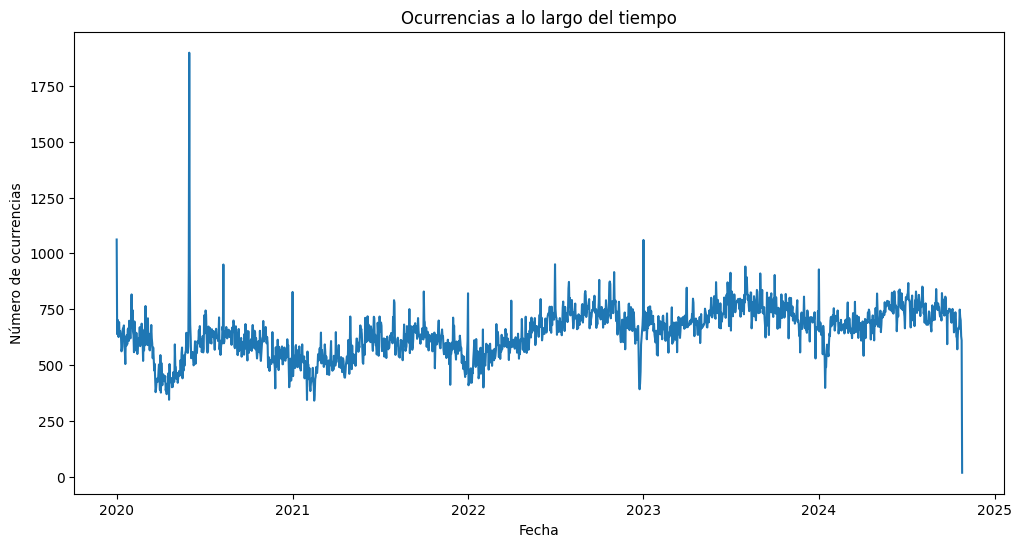

In [48]:
# Graficar la serie temporal
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title("Ocurrencias a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de ocurrencias")
plt.show()

In [2]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 26.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 35.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 44.7 MB/s eta 0:00:00a 0:00:01


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
data = pd.read_csv('chicago_crimes.csv')  # Ajusta el nombre del archivo según corresponda
print(data.head())  # Verifica las primeras filas del DataFrame original
print(data.shape)   # Verifica las dimensiones del DataFrame original

         ID Case Number                    Date                 Block  IUCR  \
0  13644536    JH485110  10/25/2024 12:00:00 AM     042XX N MASON AVE  1153   
1  13643287    JH483556  10/25/2024 12:00:00 AM    036XX N LEAVITT ST  1130   
2  13641969    JH481866  10/25/2024 12:00:00 AM  041XX W PETERSON AVE  0710   
3  13642350    JH482372  10/25/2024 12:00:00 AM    015XX S WABASH AVE  2820   
4  13645280    JH485785  10/25/2024 12:00:00 AM     018XX W WALNUT ST  1130   

         Primary Type                          Description  \
0  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   
2               THEFT             THEFT FROM MOTOR VEHICLE   
3       OTHER OFFENSE                     TELEPHONE THREAT   
4  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   

           Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0                     RESIDENCE   False     False  ...  38.0            

In [7]:
# Crear un GeoDataFrame a partir de los datos
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'],
data['Latitude']))

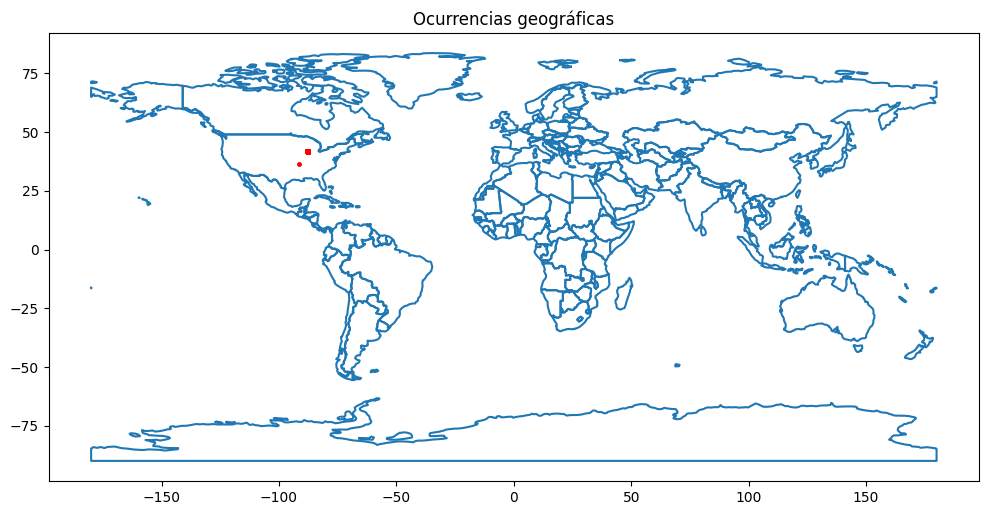

In [23]:
# Apuntar a la ubicación correcta del archivo extraído
world = gpd.read_file('/home/jovyan/work/ejercicios-jupyter/20241026-taller/110m_cultural/ne_110m_admin_0_countries.shp')

# Plotear los datos en un mapa
ax = world.boundary.plot(figsize=(12, 8))

gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title("Ocurrencias geográficas")
plt.show()

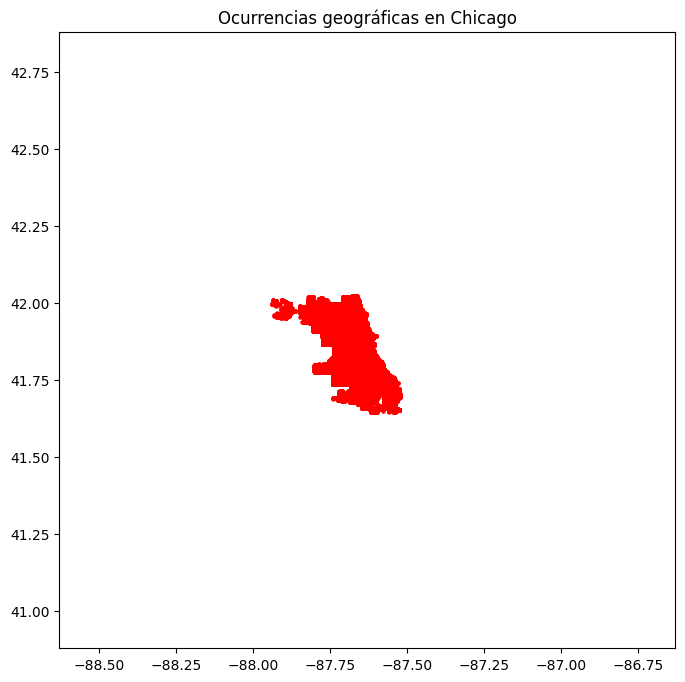

In [26]:
# Definir las coordenadas de Chicago
chicago_coordinates = [-87.6298, 41.8781]  # Longitud, Latitud

# Crear un mapa del mundo
ax = world.boundary.plot(figsize=(12, 8))

# Ajustar los límites del mapa alrededor de Chicago
ax.set_xlim(chicago_coordinates[0] - 1, chicago_coordinates[0] + 1)  # Ajustar según sea necesario
ax.set_ylim(chicago_coordinates[1] - 1, chicago_coordinates[1] + 1)  # Ajustar según sea necesario

# Plotear puntos en el mapa de Chicago
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title("Ocurrencias geográficas en Chicago")
plt.show()

In [26]:
from sklearn.ensemble import IsolationForest

In [27]:
# Entrenar un modelo de Isolation Forest
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X_train)

IsolationForest(random_state=42)

In [28]:
# Predecir anomalías en el conjunto de prueba
y_pred_anomaly = iso_forest.predict(X_test)

In [29]:
# Contar el número de anomalías
num_anomalies = sum(y_pred_anomaly == -1)
print(f"Número de anomalías: {num_anomalies}")

Número de anomalías: 102931


In [33]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.4 MB/s eta 0:00:0000:010:01


In [1]:
import pandas as pd
data = pd.read_csv('chicago_crimes.csv')  # Ajusta el nombre del archivo según corresponda
print(data.head())  # Verifica las primeras filas del DataFrame original
print(data.shape)   # Verifica las dimensiones del DataFrame original

         ID Case Number                    Date                 Block  IUCR  \
0  13644536    JH485110  10/25/2024 12:00:00 AM     042XX N MASON AVE  1153   
1  13643287    JH483556  10/25/2024 12:00:00 AM    036XX N LEAVITT ST  1130   
2  13641969    JH481866  10/25/2024 12:00:00 AM  041XX W PETERSON AVE  0710   
3  13642350    JH482372  10/25/2024 12:00:00 AM    015XX S WABASH AVE  2820   
4  13645280    JH485785  10/25/2024 12:00:00 AM     018XX W WALNUT ST  1130   

         Primary Type                          Description  \
0  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   
2               THEFT             THEFT FROM MOTOR VEHICLE   
3       OTHER OFFENSE                     TELEPHONE THREAT   
4  DECEPTIVE PRACTICE             FRAUD OR CONFIDENCE GAME   

           Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0                     RESIDENCE   False     False  ...  38.0            

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
# Convertir los datos categóricos a formato de conjuntos
categorical_columns = ['Primary Type', 'Description', 'Location Description']
data_categorical = data[categorical_columns]
data_categorical_one_hot = pd.get_dummies(data_categorical)

In [4]:
# Aplicar el algoritmo de Apriori
frequent_itemsets = apriori(data_categorical_one_hot, min_support=0.05, use_colnames=True)

In [5]:
# Extraer reglas de asociación
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
print(rules)

                              antecedents  \
0                  (Primary Type_ASSAULT)   
1                    (Description_SIMPLE)   
2   (Description_DOMESTIC BATTERY SIMPLE)   
3                  (Primary Type_BATTERY)   
4                    (Description_SIMPLE)   
5                  (Primary Type_BATTERY)   
6        (Location Description_APARTMENT)   
7                  (Primary Type_BATTERY)   
8          (Primary Type_CRIMINAL DAMAGE)   
9               (Description_TO PROPERTY)   
10         (Primary Type_CRIMINAL DAMAGE)   
11               (Description_TO VEHICLE)   
12     (Primary Type_MOTOR VEHICLE THEFT)   
13               (Description_AUTOMOBILE)   
14     (Primary Type_MOTOR VEHICLE THEFT)   
15          (Location Description_STREET)   
16                   (Primary Type_THEFT)   
17           (Description_$500 AND UNDER)   
18                   (Primary Type_THEFT)   
19                (Description_OVER $500)   

                              consequents  antecedent 